# Text Generation

## Introduction

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Ali Wong, so as a first step, let's extract the text from her comedy routine.

In [ ]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [ ]:
# Extract only Ali Wong's text
ali_text = data.transcript.loc['ali'] #transcript column in data where index is ali
print(ali_text[:1000])

Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.
And then, when they go to sleep, they just go to sl

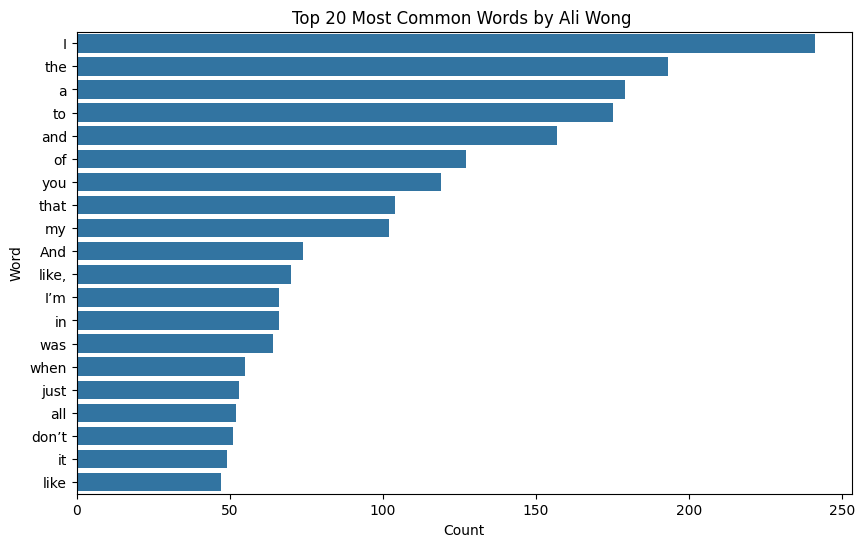

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

words = ali_text.split()
word_counts = Counter(words)

most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words by Ali Wong ')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

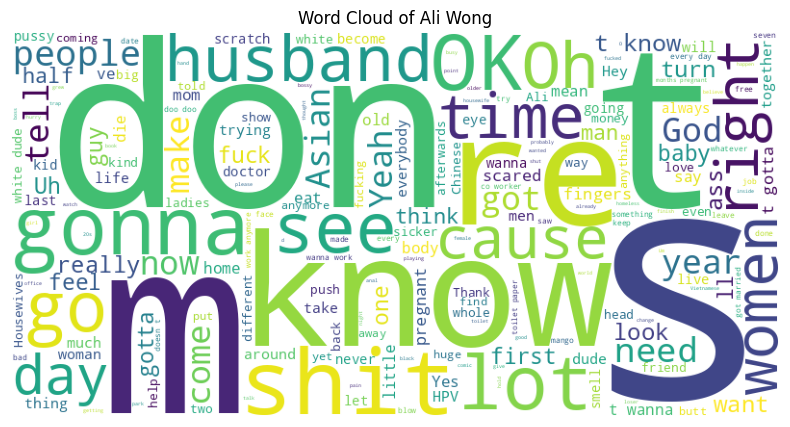

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud from Ali Wong's text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ali_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Ali Wong')
plt.show()


## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict # automatically creates a default value if a key doesn't exist.

def markov_chain(text):

    #Input: a string of text
    #Output: a dictionary where each word is a key and value is list words that follow it

    words = text.split(' ')  # Split the text into words like ["hi there friend"] → ['hi', 'there', 'friend']

    m_dict = defaultdict(list)  # 2. Create an empty defaultdict where values are lists

    for current_word, next_word in zip(words[0:-1], words[1:]):  # 3. Look at word pairs
        m_dict[current_word].append(next_word)  # 4. For each word, add the word that follows it

    m_dict = dict(m_dict)  # 5. Convert back to a normal dict before returning
    return m_dict


In [ ]:
# Create the dictionary for Ali's routine
ali_dict = markov_chain(ali_text)
ali_dict

{'Ladies': ['and'],
 'and': ['gentlemen,',
  'foremost,',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says,',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'she',
  'I',
  'I',
  'I',
  'we',
  'watched',
  'I',
  'have',
  'that',
  'recycling,',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'be',
  'half-Vietnamese.',
  'his',
  'slide.',
  'your',
  'inflamed',
  'you’re',
  'I',
  'half-Japanese',
  'I’m',
  'half-Vietnamese.',
  'playing',
  'rugby.',
  'foremost,',
  'a',
  'emotionally',
  'I',
  '20',
  'neither',
  'I',
  'I–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'very',
  'for',
  'I',
  'she',
  'rise',
  'be',
  'eat',
  'watch',
  'be',
  'now',
  'most',
  'in',
  'then',
  'digitally',
  'then',
  'then',
  'then',
  'steady',
  'brings',
  'let',
  'reverberate',
  'say,',
  'my',
  'he',
  'when',
  'I’m',
  'sicker,',
  'sicker.',
  'sicker,',
  'sicker,',
  'pos

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [ ]:
import random #randomly pick words from Markov Chain.

def generate_sentence(chain, count=15):   #chain: the Markov Chain dictionary you built (key = word, value = list of next words)

                                          #count: how many words you want in your generated sentence (default = 15)

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize() #first word

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1): # loop till count-1 bcs 1 word is already selected
        if not chain[word1]:
            word1 = random.choice(list(chain.keys()))

        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    return(sentence)

In [ ]:
generate_sentence(ali_dict)

'Chapping her Lululemon pants.” I’m not scared of that, when I just gonna live. You'

### Assignment:
1. Generate sentence for other comedians also.
2. Try making the generate_sentence function better. Maybe allow it to end with a random punctuation mark or end whenever it gets to a word that already ends with a punctuation mark.

In [ ]:
data.transcript.index.unique()

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [ ]:
for comedian in data.index:
    text = data.transcript.loc[comedian]
    chain = markov_chain(text)
    print(f"\n{comedian.title()} says:")
    print(generate_sentence(chain, count=20))


Ali says:
Stay at some risk and my husband on, you guys aren’t Mexican?” Asian-American brothers and I literally spat on a

Anthony says:
On.” So I do. But I tweeted “Other than nothing. Less than that, it sounds wrong, I was like, “Okay,

Bill says:
Marry him stubbing his eyes. “You can sleep. I just feel about the hell he’s out there like, all right

Bo says:
Eye contact. prolonged eye contact. prolonged eye contact. prolonged eye contact. prolonged eye contact. prolonged eye contact. prolonged eye contact.

Dave says:
Working in this age. I got. Because whenever trouble breaks out, he needed to the steps, and reinstates their manhood

Hasan says:
Photo he’s telling you, not like, “Yeah, I’m fucked. I’m so they’re like, “Dude, are in a hard it the

Jim says:
She’ll put the next people didn’t… Now… after being a nurse!” Do you don’t have a lot of the dog

Joe says:
Suspicious? What, are you a couple too far, they just fucking job that dude’s bed’s, like, “Bitch.” They’re not Santa

J

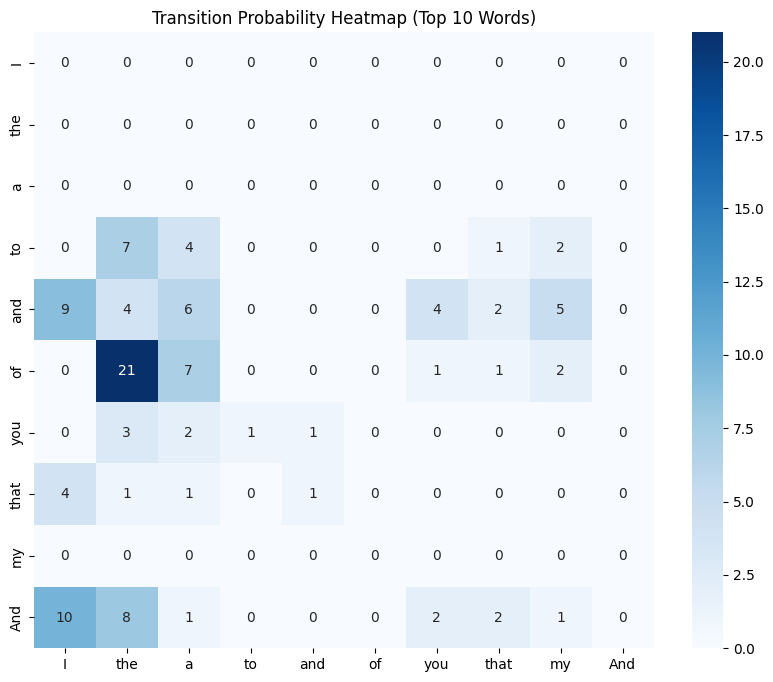

In [ ]:
# Build a small transition matrix (only for top 10 words)
top_words = [w for w, _ in word_counts.most_common(10)]
transition_matrix = pd.DataFrame(0, index=top_words, columns=top_words)

for word, next_words in chain.items():
    if word in top_words:
        for next_word in next_words:
            if next_word in top_words:
                transition_matrix.loc[word, next_word] += 1

plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, annot=True, cmap='Blues')
plt.title('Transition Probability Heatmap (Top 10 Words)')
plt.show()


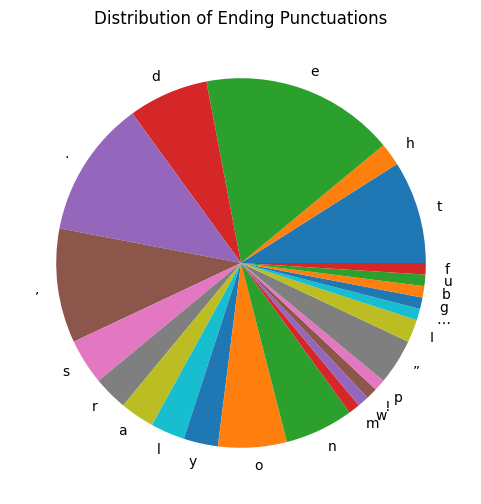

In [ ]:
generated_sentence = [generate_sentence(chain, count=20) for _ in range(100)]
ending_punctuation = [s[-1] for s in generated_sentence]
punctuation_count = Counter(ending_punctuation)


plt.figure(figsize=(6,6))
plt.pie(punctuation_count.values(), labels=punctuation_count.keys())
plt.title('Distribution of Ending Punctuations')
plt.show()

In [ ]:
import random

def generate_better_sentence(chain, max_length):
    weak_endings = ['and', 'or', 'but', 'the', 'if', 'because', 'while']

    word = random.choice(list(chain.keys()))
    sentence = [word]

    for _ in range(max_length - 1):
        next_words = chain.get(word, list(chain.keys()))
        word = random.choice(next_words)
        sentence.append(word)

        if word[-1] in '.!?':
            break

    if sentence[-1].lower() in weak_endings:
        sentence[-1] += random.choice(['.', '!', '?'])

    sentence[0] = sentence[0].capitalize()

    if sentence[-1][-1] not in '.!?':
        sentence[-1] += random.choice(['.', '!', '?'])

    return ' '.join(sentence)


In [ ]:
for comedian in data.index:
    text = data.transcript.loc[comedian]
    chain = markov_chain(text)
    print(f"\n{comedian.title()} says:")
    print(generate_better_sentence(chain, max_length=20))


Ali says:
Hole feels caked in the escrow process, I guess we live until the hood, there’s multiple hand turn this shit?

Anthony says:
Question. – What?

Bill says:
Walk to Sunday School, and complaining.

Bo says:
Louder. I don’t have sex with a bit fast and weird right brain.

Dave says:
Old. Can you trying to you.

Hasan says:
Close the claps.

Jim says:
Aren’t what happened.

Joe says:
Chick and they have sex with.

John says:
Avenue. I’m in his arm?” And then she had other way of, like, the government is Jewish, I don’t know.

Louis says:
Now,” and she’s very cute women still– “yeah.

Mike says:
Basketball court at one point, this argument with 1 1/2 minutes later, and I’m writing my mind, that behavior from?

Ricky says:
Up! They’re amazing, that was a difference.


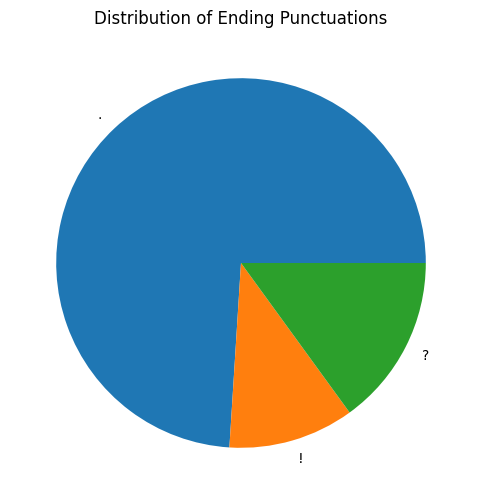

In [ ]:
generated_sentences = [generate_better_sentence(chain, max_length=20) for _ in range(100)]
ending_punctuations = [s[-1] for s in generated_sentences]
punctuation_counts = Counter(ending_punctuations)


plt.figure(figsize=(6,6))
plt.pie(punctuation_counts.values(), labels=punctuation_counts.keys())
plt.title('Distribution of Ending Punctuations')
plt.show()


.

**Bigram Markov Chain**

In [ ]:
from collections import defaultdict

def bigram_markov_chain(text):

    words = text.split(' ')
    m_dict = defaultdict(list)

    # Loop through triples of words
    for w1, w2, w3 in zip(words[0:-2], words[1:-1], words[2:]):
        m_dict[(w1, w2)].append(w3)

    return dict(m_dict)


In [ ]:
import random

def generate_bigram_sentence(chain, count=15):

    end_punctuations = ['.', '!', '?']

    word1, word2 = random.choice(list(chain.keys()))
    sentence = word1.capitalize() + ' ' + word2

    for _ in range(count-2):

        next_word = random.choice(chain[(word1, word2)])
        sentence += ' ' + next_word

        if next_word[-1] in end_punctuations:
            return sentence

        # Move window forward
        word1, word2 = word2, next_word

    # If no natural end, add random punctuation
    sentence += random.choice(end_punctuations)
    return sentence


In [ ]:
ali_text = data.transcript.loc['ali']
ali_bigram_chain = bigram_markov_chain(ali_text)

print(generate_bigram_sentence(ali_bigram_chain, count=20))


Marriage, because the Internet would crash.” “And all the pain away.
